Initializing the notebook:

In [1]:
import os
import numpy as np
from functions import *
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import fsolve
import scipy.signal as signal
import scipy.linalg as lina
import matplotlib.cm as cm
# Get the viridis colormap
my_cmap = cm.get_cmap('viridis')


# Get the directory where the current script is located
script_directory = os.getcwd()

# Change the current working directory to the script's directory
os.chdir(script_directory)

# Now the CWD is the same as the script's directory
print("New Current Working Directory:", os.getcwd())

New Current Working Directory: /Users/behradmoadeli/Documents/PhD/pfr_isothermal_recycle_delay_MPC/reports


/var/folders/8p/qn3cjd096pv6yh7qfk3xy4r00000gn/T/ipykernel_25913/2038019601.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  my_cmap = cm.get_cmap('viridis')


In [2]:
default_pars = obtain_default_pars('pars_list.csv')
display(default_pars)

pars_list = create_custom_pars_list('pars_list.csv')
# par = default_pars
par = pars_list[0] # between 0 - 3; 1 is good; 3 to compare
display(par)

{'k': 1.5, 'D': 0.2, 'v': 1, 'tau': 0.8, 'R': 0.3, 'label': 'default'}

{'k': 0.5, 'D': 0.2, 'v': 1, 'tau': 0.8, 'R': 0.3, 'label': '(k_0.5)'}

In [3]:
path_maker = par['label']
path = f"CSV/{path_maker}.csv"

if not os.path.exists(path):
    guess = {
        'guess_range_real':[-20,5,5],
        'guess_range_imag':[0,50,25]
    }
    save_dataframe_to_csv(*find_eig(par, **guess, round_sig_digits=4, tol_is_sol=1e-6, max_iter=200), 'CSV')
else:
    print("Solution has already been saved in the appropriate location.")

Solution has already been saved in the appropriate location.


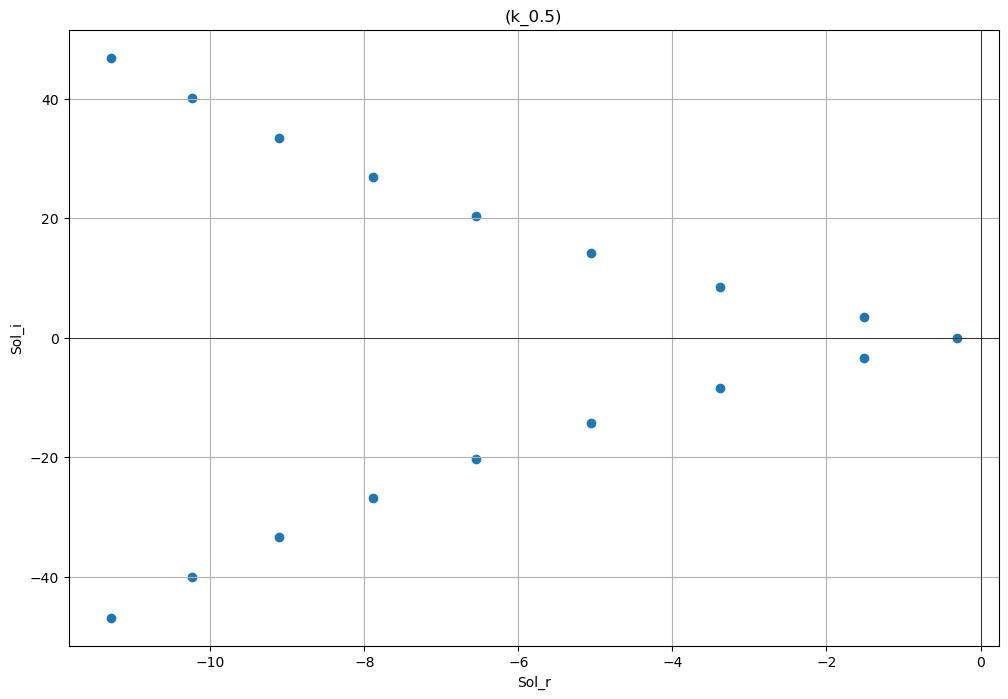

{'par': {'k': 0.5; 'D': 0.2; 'v': 1; 'tau': 0.8; 'R': 0.3; 'label': '(k_0.5)'}; 'guess_range': ([-20; 5; 5]; [0; 50; 25]); 'tols': (1e-09; 1e-06; 4)}


,Sol_r,Sol_i,Guess,g(x),g*(x),ier,msg,infodict,cumul_err,cmplx_cnj,cluster_label,instances
0,-0.311454,0.000000,[0. 0.],0.000000e+00,0.000000e+00,1,The solution converged.,"{'nfev': 11, 'fjac': array([[-1., 0.],\n ...",0.000000e+00,Real,-1,4
1,-1.514382,3.453395,[ 5. 10.],5.120322e-13,1.086173e-12,1,The solution converged.,"{'nfev': 38, 'fjac': array([[-0.65814934, 0.7...",1.441948e-24,No,0,38
2,-1.514382,-3.453395,[ 5. 10.],5.120322e-13,1.086173e-12,1,The solution converged.,"{'nfev': 38, 'fjac': array([[-0.65814934, 0.7...",1.441948e-24,Yes,0,38
3,-3.377304,-8.449155,[-3.37730442 -8.44915461],3.437443e-13,2.190370e-12,1,The solution converged.,"{'nfev': 4, 'fjac': array([[-0.41684123, -0.90...",4.915880e-24,Yes,1,46
4,-3.377304,8.449155,[-3.37730442 -8.44915461],3.437443e-13,2.190370e-12,1,The solution converged.,"{'nfev': 4, 'fjac': array([[-0.41684123, -0.90...",4.915880e-24,No,1,46
5,-5.062897,14.230058,[ 5. 24.],4.033702e-14,7.806679e-13,1,The solution converged.,"{'nfev': 6, 'fjac': array([[-0.6913636 , -0.72...",6.110695e-25,No,3,50
6,-5.062897,-14.230058,[ 5. 24.],4.033702e-14,7.806679e-13,1,The solution converged.,"{'nfev': 6, 'fjac': array([[-0.6913636 , -0.72...",6.110695e-25,Yes,3,50
7,-6.552602,20.406314,[-15. 20.],1.648672e-14,8.961857e-13,1,The solution converged.,"{'nfev': 6, 'fjac': array([[-0.99958925, 0.02...",8.034206e-25,No,2,42
8,-6.552602,-20.406314,[-15. 20.],1.648672e-14,8.961857e-13,1,The solution converged.,"{'nfev': 6, 'fjac': array([[-0.99958925, 0.02...",8.034206e-25,Yes,2,42
9,-7.889860,-26.820309,[ -7.88986016 -26.82030884],2.843558e-15,2.343714e-13,1,The solution converged.,"{'nfev': 4, 'fjac': array([[-0.98867218, -0.15...",5.493805e-26,Yes,4,34


In [4]:
df, label, metadata = plot_single_df(
        path, filter=True,
        real_lower_bound=-40, real_upper_bound=5, imag_lower_bound=-500, imag_upper_bound=500
)
n_lambdas = len(df)
display(df.head(n_lambdas))

In [5]:
lambdas = []
for index, row in df.head(n_lambdas).iterrows():
    l = complex(row['Sol_r'], row['Sol_i'])
    print(f'lambda_{index+1} = {l}')
    lambdas.append(l)

lambda_1 = (-0.3114537940329228+0j)
lambda_2 = (-1.5143820390320706+3.453395112882113j)
lambda_3 = (-1.5143820390320706-3.453395112882113j)
lambda_4 = (-3.377304419704794-8.449154612652826j)
lambda_5 = (-3.377304419704794+8.449154612652826j)
lambda_6 = (-5.0628972963709495+14.23005790657911j)
lambda_7 = (-5.0628972963709495-14.23005790657911j)
lambda_8 = (-6.5526018649242905+20.40631373514393j)
lambda_9 = (-6.5526018649242905-20.40631373514393j)
lambda_10 = (-7.889860155740485-26.820308838638105j)
lambda_11 = (-7.889860155740485+26.820308838638105j)
lambda_12 = (-9.10954095090518+33.395116951232325j)
lambda_13 = (-9.10954095090518-33.395116951232325j)
lambda_14 = (-10.236228934199069-40.08735887081052j)
lambda_15 = (-10.236228934199069+40.08735887081052j)
lambda_16 = (-11.287428680305045+46.86997970798541j)
lambda_17 = (-11.287428680305045-46.86997970798541j)


In [6]:
from scipy.integrate import quad

normal_coefs = []
for n in range(n_lambdas):
    l = lambdas[n]
    
    i_phi = quad(eig_fun_mul_0,0,1,args=(par, l),complex_func=True)[0]
    b_phi = np.sqrt(1/i_phi)
    
    i_psi = quad(eig_fun_mul_1,0,1,args=(par, l, [b_phi, 1]),complex_func=True)[0]
    b_psi = (1/i_psi)
    
    b = (b_phi, b_psi.conjugate())
    normal_coefs.append(b)
    
    print(f'normal_coef_phi_{n+1} = {complex(round(normal_coefs[n][0].real,4),round(normal_coefs[n][0].imag,4))}')
    print(f'normal_coef_psi_{n+1} = {complex(round(normal_coefs[n][1].real,4),round(normal_coefs[n][1].imag,4))}')
    print()

normal_coef_phi_1 = (0.3521+0j)
normal_coef_psi_1 = (-0.5544+0j)

normal_coef_phi_2 = (0.3726+0j)
normal_coef_psi_2 = (0.5765-0.2921j)

normal_coef_phi_3 = (0.3726-0j)
normal_coef_psi_3 = (0.5765+0.2921j)

normal_coef_phi_4 = (0.4054+0j)
normal_coef_psi_4 = (0.564-0.0034j)

normal_coef_phi_5 = (0.4054-0j)
normal_coef_psi_5 = (0.564+0.0034j)

normal_coef_phi_6 = (0.4076+0j)
normal_coef_psi_6 = (0.4955+0.1032j)

normal_coef_phi_7 = (0.4076-0j)
normal_coef_psi_7 = (0.4955-0.1032j)

normal_coef_phi_8 = (0.4012-0j)
normal_coef_psi_8 = (0.4459+0.1449j)

normal_coef_phi_9 = (0.4012+0j)
normal_coef_psi_9 = (0.4459-0.1449j)

normal_coef_phi_10 = (0.3929-0j)
normal_coef_psi_10 = (0.4103-0.1655j)

normal_coef_phi_11 = (0.3929+0j)
normal_coef_psi_11 = (0.4103+0.1655j)

normal_coef_phi_12 = (0.3846-0j)
normal_coef_psi_12 = (0.3835+0.1766j)

normal_coef_phi_13 = (0.3846+0j)
normal_coef_psi_13 = (0.3835-0.1766j)

normal_coef_phi_14 = (0.3768+0j)
normal_coef_psi_14 = (0.3626-0.1829j)

normal_coef_phi_

In [7]:
for n in range(n_lambdas):
    l = lambdas[n]
    b = normal_coefs[n]

    print(np.round(quad(eig_fun_mul_0,0,1,args=(par, l, b),complex_func=True)[0],4))

(1+0j)
(1+0j)
(1-0j)
(1+0j)
(1-0j)
(1+0j)
(1-0j)
(1-0j)
(1+0j)
(1-0j)
(1+0j)
(1-0j)
(1+0j)
(1+0j)
(1-0j)
(1+0j)
(1-0j)


## Open-loop Response

To check if the above gain stabilizes the system, the system can be modeled using FDM given full-state feedback. The code is as follows:

Zero input, unstable open-loop system:

In [8]:
from scipy.sparse import csr_matrix, vstack, hstack
from scipy.integrate import solve_ivp
import plotly.graph_objs as go

N_zeta = 100
zeta = np.linspace(0,1,N_zeta)
dz = zeta[1]

# Define the time points for the solution
t_end = 5
N_t = 200
t_eval = np.linspace(0, t_end, num=N_t)  # Time points at which to evaluate
dt = t_eval[1]

(k, v, D, tau, R) = (par['k'], par['v'], par['D'], par['tau'], par['R'])
# k = -1

# Lists to hold data for middle rows
rows_data = [
    k - (2*D)/(dz**2) - (v)/(dz) - (v**2)/(2*D),
    (2*D)/(dz**2),
    R * ((v)/(dz) + (v**2)/(2*D))]
rows_row_indices = [0,0,0]
rows_col_indices = [0,1,N_zeta]

# Fill the middle rows (from index 1 to N_zeta-2)
for i in range(1, N_zeta-1):
    # Fill the element before the diagonal (3), if it exists
    rows_data.extend([
        (D)/(dz**2) + (v)/(2*dz),
        k - (2*D)/(dz**2),
        (D)/(dz**2) - (v)/(2*dz)
    ])
    rows_row_indices.extend([i, i, i])
    rows_col_indices.extend([i-1, i, i+1])

# Define the last row
rows_data.extend([
    (2*D)/(dz**2),
    k - (2*D)/(dz**2)
])
rows_row_indices.extend([N_zeta-1, N_zeta-1])
rows_col_indices.extend([N_zeta-2, N_zeta-1])

for i in range(N_zeta, 2*N_zeta-2):
    rows_data.extend([
        -1/(tau*dz),
        1/(tau*dz)
        ])
    rows_row_indices.extend([i,i])
    rows_col_indices.extend([i,i+1])

# Define the last row
rows_data.extend([
        1/(tau*dz),
        -1/(tau*dz)
        ])
rows_row_indices.extend([2*N_zeta-2, 2*N_zeta-2])
rows_col_indices.extend([N_zeta-1, 2*N_zeta-2])

# Define the last row
rows_data.extend([
    (2*D)/(dz**2),
    k - (2*D)/(dz**2)
])
rows_row_indices.extend([2*N_zeta-1, 2*N_zeta-1])
rows_col_indices.extend([N_zeta-2, N_zeta-1])

# Construct the middle rows as a sparse matrix
A_ode = csr_matrix((rows_data, (rows_row_indices, rows_col_indices)), shape=(2*N_zeta, 2*N_zeta))

In [9]:
# Define the function representing the system of ODEs
def system_zero_u(t, x, A, par):
    
    (k, v, D, tau, R) = (par['k'], par['v'], par['D'], par['tau'], par['R'])
    
    return A.dot(x)


# Define the initial condition
phi_1_0 = init_cond_func_1(zeta)
phi_2_0 = init_cond_func_2(zeta, par)

x0 = [*phi_1_0, *phi_2_0]



# Solve the system using solve_ivp
solution = solve_ivp(system_zero_u, (0, t_end), x0, args=(A_ode, par), t_eval=t_eval, method='RK45')

# Access the solution
times = solution.t
x_values = solution.y


# Create phi_sol with the first 100 rows and all columns of x_values
phi_sol = x_values[:N_zeta, :]

# Create psi_sol with the last 99 rows and all columns of x_values
psi_sol = x_values[N_zeta:, :]

z_grid, t_grid = np.meshgrid(t_eval, zeta)

# Create data traces for phi_sol
phi_trace = go.Surface(x=z_grid, y=t_grid, z=phi_sol, colorscale='Viridis', name='phi')

# Create a layout for phi_sol plot
phi_layout = go.Layout(
    scene=dict(
        xaxis=dict(title='t'),
        yaxis=dict(title='zeta'),
        zaxis=dict(title='phi')
    ),
    title='Phi Plot',
    width=600,
    height=500,
)

# Create a figure for phi_sol plot
phi_fig = go.Figure(data=[phi_trace], layout=phi_layout)

# Plot phi_sol figure
phi_fig.show()


# Create data traces for psi_sol
psi_trace = go.Surface(x=z_grid, y=t_grid, z=psi_sol, colorscale='Viridis', name='psi')

# Create a layout for psi_sol plot
psi_layout = go.Layout(
    scene=dict(
        xaxis=dict(title='t'),
        yaxis=dict(title='zeta'),
        zaxis=dict(title='psi')
    ),
    title='Psi Plot',
    width=600,
    height=500,
)

# Create a figure for psi_sol plot
psi_fig = go.Figure(data=[psi_trace], layout=psi_layout)

# Plot psi_sol figure
psi_fig.show()

In [33]:
zeta = np.linspace(0,1,10)
phi_1_0 = init_cond_func_1(zeta)
phi_2_0 = init_cond_func_2(zeta, par)
x0 = np.array([phi_1_0, phi_2_0])

xd = A_d(x0, 200, par, 5)

In [35]:
par

{'k': 0.5, 'D': 0.2, 'v': 1, 'tau': 0.8, 'R': 0.3, 'label': '(k_0.5)'}

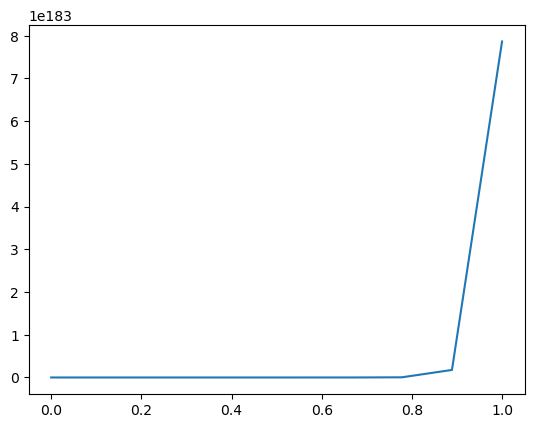

In [34]:
plt.plot(zeta, xd[0])

In [10]:
import numpy as np
import scipy.linalg as lina

def expm_P(P, z=1, e=0):
    return lina.expm(P * (z - e))

def Rs(x, s, par):
    
    N_zeta = len(x[0])
    zeta = np.linspace(0,1,N_zeta)
    
    (k, v, D, tau, R) = (par['k'], par['v'], par['D'], par['tau'], par['R'])
    P = np.array([
        [0, 1, 0],
        [(s-k)/D, v/D, 0],
        [0, 0, tau * s]
    ])
    T1 = expm_P(P)
    X = np.array(x)

    a = np.array([
        [-v, D, R*v],
        [T1[0,0], T1[0,1], -T1[2,2]],
        [T1[1,0], T1[1,1], 0]
    ])
    M = lina.inv(a)
    
    x1 = np.array(x[0,:])
    x2 = np.array(x[1,:])
    X1 = X[0,:]
    X2 = X[1,:]
    
    F1e = np.array([expm_P(P, e=e) for e in zeta])
    I1_0 = np.array([F1e[e,0,1] * x1[e] / D - tau * F1e[e,2,2] * x2[e] for e in range(N_zeta)])
    I2_0 = np.array([tau * F1e[e,2,2] * x2[e] for e in range(N_zeta)])
    b = np.array([
        0,
        np.trapz(I1_0, zeta),
        np.trapz(I2_0, zeta)
    ])
    X0 = M @ b
    [X1[0], X2[0], X1_prime_0] = X0
    
    for i, z in enumerate(zeta[1:], start=1):
        Tz = expm_P(P, z=z)
        I1 = []
        I2 = []
        for j, e in enumerate(zeta[:i]):
            Fze = expm_P(P, z=z, e=e)
            I1.append(Fze[0,1] * x1[j])
            I2.append(Fze[2,2] * x2[j])
        X1[i] = Tz[0,0] * X1[0] + Tz[0,1] * X1_prime_0 - 1/D * np.trapz(I1, zeta[:i])
        X2[i] = Tz[2,2] * X2[0] - tau * np.trapz(I2, zeta[:i])
        
    X = np.array([X1, X2])
        
    return X

def A_d(x, s, par, pow=1):
    
    for i in range(pow):
        x = -x + 2*s * Rs(x, s, par)

    return x

def B_d(zeta, s, par, u=1):
        
    (k, v, D, tau, R) = (par['k'], par['v'], par['D'], par['tau'], par['R'])
    P = np.array([
        [0, 1, 0],
        [(s-k)/D, v/D, 0],
        [0, 0, tau * s]
    ])
    T1 = expm_P(P)
    X = np.array(x)

    a = np.array([
        [-v, D, R*v],
        [T1[0,0], T1[0,1], -T1[2,2]],
        [T1[1,0], T1[1,1], 0]
    ])
    M = lina.inv(a)
    
    X1 = X[0,:]
    X2 = X[1,:]
    
    b = np.array([0, T1[0,1], T1[1,1]]) * v * (1-R) / D * u
    X0 = M @ b
    [X1[0], X2[0], X1_prime_0] = X0
    
    for i, z in enumerate(zeta[1:], start=1):
        Tz = expm_P(P, z=z)
        X1[i] = Tz[0,0] * X1[0] + Tz[0,1] * X1_prime_0 - v * (1-R) / D * Tz[0,1] * u
        X2[i] = Tz[2,2] * X2[0]
        
    X = np.array([X1, X2])
        
    return np.sqrt(2*s) * X

In [ ]:
def Rs_adjoint(x, s, par):
    
    N_zeta = len(x[0])
    zeta = np.linspace(0,1,N_zeta)
    
    (k, v, D, tau, R) = (par['k'], par['v'], par['D'], par['tau'], par['R'])
    P = np.array([
        [0, 1, 0],
        [(s-k)/D, -v/D, 0],
        [0, 0, -tau * s]
    ])
    T1 = expm_P(P)
    X = np.array(x)

    a = np.array([
        [0, 1, 0],
        [R*v, 0, 1/tau],
        [D*T1[1,0]+v*T1[0,0], D*T1[1,1]+v*T1[0,1], -1/tau*T1[2,2]]
    ])
    M = lina.inv(a)
    
    x1 = np.array(x[0,:])
    x2 = np.array(x[1,:])
    X1 = X[0,:]
    X2 = X[1,:]
    
    F1e = np.array([expm_P(P, e=e) for e in zeta])
    I1_0 = np.array([(F1e[e,0,1] * v/ D + F1e[e,1,1]) * x1[e] for e in range(N_zeta)])
    I2_0 = np.array([x2[e] for e in range(N_zeta)])
    b = np.array([
        0,
        0,
        -(np.trapz(I1_0, zeta) + np.trapz(I2_0, zeta))
    ])
    X0 = M @ b
    [X1[0], X2[0], X1_prime_0] = X0
    
    for i, z in enumerate(zeta[1:], start=1):
        Tz = expm_P(P, z=z)
        I1 = []
        I2 = []
        for j, e in enumerate(zeta[:i]):
            Fze = expm_P(P, z=z, e=e)
            I1.append(Fze[0,1] * x1[j])
            I2.append(Fze[2,2] * x2[j])
        X1[i] = Tz[0,0] * X1[0] + Tz[0,1] * X1_prime_0 - 1/D * np.trapz(I1, zeta[:i])
        X2[i] = Tz[2,2] * X2[0] + tau * np.trapz(I2, zeta[:i])
        
    X = np.array([X1, X2])
        
    return X

def A_d_adjoint(x, s, par, pow=1):
    
    for i in range(pow):
        x = -x + 2*s * Rs_adjoint(x, s, par)

    return x

def B_d_adjoint(x, s, par):
    
    N_zeta = len(x[0])
    zeta = np.linspace(0,1,N_zeta)
    
    B = B_d(zeta, s, par)
    [B1, B2] = B
    I = B1 * x[0] + B2 * x[1]
    X = np.trapz(I, zeta)
    
    return X

In [11]:
x = np.array([phi_1_0, phi_2_0])

Rs(x, 0.1, par).shape

(2, 100)

# LQR Controller Design

## Ricatti Equation

Following is the Algebraic Ricatti Equation for finite dimensional systems:

$
A^TP + PA - PBR^{-1}B^TP + Q = 0
$

This can be extended for infinite dimensional setup by applying the projection $\langle (.)x, y\rangle$, resulting in the following:

$
\langle A^*Px, y\rangle + \langle PAx, y\rangle -  \langle PB R^{-1} B^*Px, y\rangle + \langle Qx, y\rangle = 0 \Rightarrow
$

$
\langle Px, Ay\rangle + \langle Ax, Py\rangle -  R^{-1} \langle B^*Px, B^*Py\rangle + \langle Qx, y\rangle = 0
$

The goal is to solve the above equation to obtain `P` operator, which will give the optimal gain that stabilizes the system. We can define the $P$ operator as follows:

$
\hat{P}x = \sum_{i=1}^{\infty}\sum_{j=1}^{\infty} p_{i,j} \langle x, \Psi_j \rangle \Psi_i
$

This definition assures that $P\Phi_m$ falls within the domain of operator $A^*$, and operator $P$ can operate on $A\Phi_m$.

However, we first need to obtain $\hat{B}^*$. This is done as follows:

$
\langle A\Phi + Bu, \Psi \rangle = \langle A \Phi , \Psi\rangle + \langle Bu , \Psi\rangle = \langle \Phi, A^*\Psi \rangle + \langle u, B^*\Psi \rangle \Rightarrow
$

$
\langle u, B^*\Psi \rangle = \langle A\Phi + Bu, \Psi \rangle - \langle \Phi, A^*\Psi \rangle
$

### Obtaining B*

This is very similar to the approach we took to calculate the adjoint operator $\hat{A}^*$, with the difference being that this time $u \neq 0 $. Therefore we can open the inner product terms into integration and perform integration by parts, with the following definitions for $\hat{A}$ and $\hat{A}^*$:

$$
\begin{align*}
    u \neq 0 \Rightarrow&\begin{cases}
        &\hat{A} (.) =
        &\begin{bmatrix}
            D\partial_{\zeta\zeta} (.) -v\partial_{\zeta} (.) +k(.) & 0 \\
            0 & \dfrac{1}{\tau}\partial_{\zeta} (.)
        \end{bmatrix} \\
        \, \\
        &B.C. \quad : \quad &\begin{cases}
            D\partial_\zeta \phi_1(0)-v\phi_1(0)=-v\left[ R\phi_2(0) + (1-R) u\right] \\
            \partial_\zeta \phi_1(1)=0 \\
            \phi_2(1)=\phi_1(1)
        \end{cases}
    \end{cases}\\
    \, \\
    &\begin{cases}
        &{\hat{A}}^{*} (.) =
        &\begin{bmatrix}
            D\partial_{\zeta\zeta} (.) +v\partial_{\zeta} (.) +k(.) & 0\\
            0 & -\dfrac{1}{\tau}\partial_{\zeta} (.)
        \end{bmatrix} \\
        \, \\
        &B.C. \quad : \quad &\begin{cases}
            D\partial_\zeta \psi_{1}(1)+v\psi_{1}(1)=\dfrac{1}{\tau}\psi_{2}(1) \\
            Rv\psi_{1}(0) = \dfrac{1}{\tau}\psi_{2}(0) \\
            \partial_\zeta \psi_{1}(0)=0
        \end{cases}
    \end{cases}
\end{align*}
$$

Doing the integration by parts, we get to the followig point:

$
\langle u, B^*\Psi \rangle = v (1-R) u \overline{\psi}_1(0) \Rightarrow B^*(.) = \Bigl[ \quad v(1-R) \int_0^1 \delta_{\zeta=0}(\zeta) (.)d\zeta \qquad , \qquad 0 \quad \Bigr]
$

where $\delta(\zeta)$ is the dirac delta function. Now that we have $B^*$ defined, we may go back and try to solve the Ricatti equation.

### Constructing Ricatti Equation for Infinite Dimensional Setup

For all $x,y$ in the domain of $\hat{A}$ in the above equation, the solution $P$ is unique. Therefore, we arbitrarily pick $x = \Phi_m$ and $y = \Phi_n$ to obtain the solution. Therefore we can write:

$
\langle P\Phi_m, A\Phi_n\rangle + \langle A\Phi_m, P\Phi_n\rangle -  R^{-1} \langle B^*P\Phi_m, B^*P\Phi_n\rangle + \langle Q\Phi_m, \Phi_n\rangle = 0
$

By applying the definition of $P$ operator and obtaining corresponding eigenvalues where $A$ operates on eigenfunctions, we have:

$
\langle \sum_i p_{im} \Phi_i , \lambda_n \Phi_n \rangle + \langle \lambda_m \Phi_m , \sum_i p_{in} \Phi_i \rangle - R^{-1} \langle B^*P\Phi_m, B^*P\Phi_n\rangle + \langle Q\Phi_m, \Phi_n\rangle = 0
$

The first two inner products may be further simplified to give:

$
\overline{\lambda_n} p_{nm} + \lambda_m \overline{p_{mn}} - R^{-1} \langle B^*P\Phi_m, B^*P\Phi_n\rangle + \langle Q\Phi_m, \Phi_n\rangle = 0
$

Knowing that $P$ is hermitian, we can replace $\overline{p_{mn}}$ with $p_{nm}$ to get the following:

$
p_{nm}(\lambda_m + \overline{\lambda_n}) - R^{-1} \langle B^*P\Phi_m, B^*P\Phi_n\rangle + \langle Q\Phi_m, \Phi_n\rangle = 0
$

We may also break down the term $B^*P\Phi_n$, knowing how $P$ operates on $\Phi_n$ and how $B^*$ operates on the result:

$
P\Phi_n = \sum_i p_{in} \Psi_i
$

$
B^*P\Phi_n = \Bigl[ \quad v(1-R) \int_0^1 \delta_{\zeta=0}(\zeta) (.)d\zeta \qquad , \qquad 0 \quad \Bigr] \sum_i p_{in} \begin{bmatrix} \psi_1^{(i)} \\ \, \\ \psi_2^{(i)} \end{bmatrix} \\ 
= \sum_i v(1-R) p_{in} \psi_1^{(i)}(\zeta=0)
$

We can simplify the above expression by defining $\gamma_i \equiv v(1-R) \psi_1^{(i)}(\zeta=0)$. Therefore we have:

$
B^*P\Phi_n = \sum_i p_{in} \gamma_i
$

Same goes for $B^*P\Phi_m$:

$
B^*P\Phi_m = \sum_i p_{im} \gamma_i
$

Using the above expressions, we can rewrite the third inner product as follows:

$
\langle B^*P\Phi_m, B^*P\Phi_n\rangle = \langle \sum_i p_{in} \gamma_i, \sum_i p_{im} \gamma_i \rangle
$

Now, we define the infinite dimensional row vector $\Gamma$ as follows:

$\Gamma \equiv \left[ \quad \gamma_i \quad \right] \qquad \forall i$

Which results in further simplifying the above inner product into the following:

$
(p[:,m] \cdot \Gamma) \cdot \overline{(p[:,n] \cdot \Gamma)}
$

where $p[:,m]$ and $p[:,n]$ are column vectors obtained from the `m`th and `n`th column of $P$ matrix, respectively. Also, $v \cdot w$ represents element by element dot product of two vectors $v, w$; without considering the complex conjugate of $w$ (as opposed with the inner product defined on the inner product space).

The last inner product is also simply a scalar. We can rewrite it as follows:

$q_{mn} \equiv \langle Q \Phi_m, \Phi_n\rangle$

Now we can rewrite the Algebraic Ricatti Equation as follows:

$
p_{nm}(\lambda_m + \overline{\lambda_n}) - R^{-1} (p[:,m] \cdot \Gamma) \cdot \overline{(p[:,n] \cdot \Gamma)} + q_{mn} = 0
$

### Solving Ricatti Equation

By reducing the infinite sums in the Ricatti equation to finite sums over N modes, we can have a system of nonlinear (quadratic, due to the term involving $\Gamma$) algebraic equations. The unknowns are $p_{ij}$ coefficients. Knowing that P will become a square $N \times N$ hermitian matrix, where $p_{ij} = \overline{p_{ji}}$, we will have $\frac{N(N+1)}{2}$ sets of unknowns. Same number of equation can be obtained by plugging all possible pairs of eigenfunctions $\Phi_i, \Phi_j$ into the above equation, where $i = 1, ..., N$ and $j = 1, ..., i$.

A reduced $P_{N \times N}$ matrix may be obtained by solving the resulting system of quadratic algebraic equation. Note that the system contains complex values; therefore both the imaginary and the real parts of the unknowns and equations shall be considered simultanously.

Once the finite dimensional $P$ matrix is obtained, one can calculate the optimal stabilizing feedback gain $K(\zeta)$ as follows:

$
u = \langle K(\zeta) , x(\zeta) \rangle = B^*Px = \Bigl[ v(1-R) \int_0^1 \delta_{\zeta=0}(\zeta) (.)d\zeta , 0 \Bigr] \cdot \sum_{i=1}^{N}\sum_{j=1}^{N} p_{i,j} \langle x, \Psi_j \rangle \Psi_i = \sum_{i}\sum_{j} p_{i,j} \langle x, \Psi_j \rangle \gamma_i \\ \, \\
= \sum_{i}\sum_{j} p_{i,j} \gamma_i \int_0^1 x(\zeta) \cdot \overline{\Psi_j}(\zeta) d\zeta \\ \, \\
= \int_0^1 \sum_{i}\sum_{j} p_{i,j} \gamma_i \overline{\Psi_j}(\zeta) \cdot x(\zeta) d\zeta \\ \, \\
\Rightarrow K(\zeta) = \sum_{i}\sum_{j} p_{i,j} \gamma_i \overline{\Psi_j}(\zeta)
$

This is done in the following code blocks:

In [ ]:
n_modes = 3
r_ctrl = 50
q_ctrl = 0.05

error = 1
counter = 0


while error > 1e-15:
    p_0_shape = np.array([*triu_to_flat(np.zeros((n_modes,n_modes)))] * 2).shape # Proper shape for initial guess
    p_0 = (np.random.rand(*p_0_shape) - 0.5) * 0.1 # Initial guess
    p_sol_flat = fsolve(ricatti, p_0, (par, lambdas[:n_modes], normal_coefs[:n_modes], [q_ctrl, r_ctrl]), xtol = 1e-14)
    K_ricatti = k_ricatti(zeta, p_sol_flat, par, lambdas[:n_modes], normal_coefs[:n_modes])
    has_imag_values = np.any(np.abs(K_ricatti.imag) > 1e-5)
    if not has_imag_values:
        error_array = np.array(ricatti(p_sol_flat, par, lambdas[:n_modes], normal_coefs[:n_modes], [q_ctrl, r_ctrl]))
        error = np.sqrt(sum(error_array ** 2)) / (0.5 * len(p_0))
    else:
        error = 1
    counter += 1
    if counter == 50:
        p_sol_flat = np.zeros_like(p_sol_flat)
        error = 1
        print('Does not converge')
        break
    print('counter = ', counter)
    print('error = ', error)
    print('k has imaginary values? ', has_imag_values)
    
if error < 1:
    K_ricatti = K_ricatti.real.astype(float)
    print("k = ")
    new_row_df = pd.DataFrame([zeta])
    K_ricatti_df = pd.concat([new_row_df, pd.DataFrame(K_ricatti)], ignore_index=True)
    K_ricatti_df.index = ['zeta', 'k_1(zeta)', 'k_2(zeta)']
    display(K_ricatti_df)

    plt.plot(zeta, K_ricatti[0], label=r'$k_1(\zeta)$', color=my_cmap(0.2))
    plt.plot(zeta, K_ricatti[1], label=r'$k_2(\zeta)$', color=my_cmap(0.8))

    plt.xlabel(r'$\zeta$')
    plt.ylabel(r'$K(\zeta)$')
    plt.title(f'Controller gains considering {n_modes} modes')

    plt.legend()
    plt.grid(True)
    plt.show()

    K_controller = np.zeros((1,2*N_zeta))
    K_controller[0,:N_zeta] = K_ricatti[0]
    K_controller[0,N_zeta:] = K_ricatti[1]


# Closed Loop Response

In [14]:
B = np.zeros((2*N_zeta,1))
B[0,0] = ((v)/(dz) + (v**2)/(2*D)) * (1-R)

C = np.zeros((1,2*N_zeta))
C[0,int(N_zeta/2 - 1)] = 1

A_cl = A_ode + B@K_controller
A_cl = csr_matrix(A_cl)

# Define the initial condition
phi_1_0 = init_cond_func_1(zeta)
phi_2_0 = init_cond_func_2(zeta, par)

x0 = [*phi_1_0, *phi_2_0]

In [ ]:
# Define the function representing the system of ODEs
def system_fullstate(t, x, A, par):
    
    (k, v, D, tau, R) = (par['k'], par['v'], par['D'], par['tau'], par['R'])

    return A.dot(x)

# Solve the system using solve_ivp
solution = solve_ivp(system_fullstate, (0, t_end), x0, args=(A_cl, par), t_eval=t_eval, method='RK45')

# Access the solution
times = solution.t
x_values = solution.y


# Create phi_sol with the first 100 rows and all columns of x_values
phi_sol = x_values[:N_zeta, :]

# Create psi_sol with the last 99 rows and all columns of x_values
psi_sol = x_values[N_zeta:, :]

z_grid, t_grid = np.meshgrid(t_eval, zeta)

# Create data traces for phi_sol
phi_trace = go.Surface(x=z_grid, y=t_grid, z=phi_sol, colorscale='viridis', name='phi')

# Create a layout for phi_sol plot
phi_layout = go.Layout(
    scene=dict(
        xaxis=dict(title='t (s)'),
        yaxis=dict(title='\u03B6'),  # \u03B6 Unicode for zeta
        zaxis=dict(title='x<sub>1</sub>(\u03B6,t)'),  
    ),
    title='Reactor concentration profile', 
    width=800,
    height=800,
)

# Create a figure for phi_sol plot
phi_fig = go.Figure(data=[phi_trace], layout=phi_layout)

# Plot phi_sol figure
phi_fig.show()


# Create data traces for psi_sol
psi_trace = go.Surface(x=z_grid, y=t_grid, z=psi_sol, colorscale='viridis', name='psi')

# Create a layout for psi_sol plot
psi_layout = go.Layout(
    scene=dict(
        xaxis=dict(title='t (s)'),
        yaxis=dict(title='\u03B6'),
        zaxis=dict(title='x<sub>2</sub>(\u03B6,t)'),
    ),
    title='Recycle concentration profile',
    width=800,
    height=800,
)

# Create a figure for psi_sol plot
psi_fig = go.Figure(data=[psi_trace], layout=psi_layout)

# Plot psi_sol figure
psi_fig.show()

In [ ]:
# Create the plot for phi_sol
fig_phi = plt.figure(figsize=(10,7))
ax_phi = fig_phi.add_subplot(111, projection='3d')

# Plot the surface with meshing
surf_phi = ax_phi.plot_surface(t_grid, z_grid, phi_sol, cmap='viridis', edgecolor='k', linewidth=0.5, antialiased=True)

# Customize the appearance
ax_phi.set_xlabel('t (s)')
ax_phi.set_ylabel('space')
ax_phi.set_zlabel('phi')
ax_phi.set_title('Phi Plot')

# Set the view angle
ax_phi.view_init(elev=30, azim=215)  # Adjust the azimuthal angle here

# Add a color bar which maps values to colors
fig_phi.colorbar(surf_phi, shrink=0.5, aspect=5)

# Show the plot
plt.show()

# Create the plot for psi_sol
fig_psi = plt.figure(figsize=(10,7))
ax_psi = fig_psi.add_subplot(111, projection='3d')

# Plot the surface with meshing
surf_psi = ax_psi.plot_surface(t_grid, z_grid, psi_sol, cmap='viridis', edgecolor='k', linewidth=0.5, antialiased=True)

# Customize the appearance
ax_psi.set_xlabel('t (s)')
ax_psi.set_ylabel('space')
ax_psi.set_zlabel('psi')
ax_psi.set_title('Psi Plot')

# Set the view angle
ax_psi.view_init(elev=30, azim=35)  # Adjust the azimuthal angle here

# Add a color bar which maps values to colors
fig_psi.colorbar(surf_psi, shrink=0.5, aspect=5)

# Show the plot
plt.show()

In [ ]:
t_plots = np.linspace(0, t_end, 6)

# Create a figure with 2x2 subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Calculate global y-axis limits
phi_min, phi_max = phi_sol.min(), phi_sol.max()
psi_min, psi_max = psi_sol.min(), psi_sol.max()
y_min = min(phi_min, psi_min)
y_max = max(phi_max, psi_max)

# Iterate over each t_plot and corresponding subplot
for i, t_plot in enumerate(t_plots):
    # Find the index corresponding to the closest time point
    t_index = np.abs(t_eval - t_plot).argmin()
    
    # Set the same y-axis limits for each subplot
    axes[i].set_ylim(-1.0, 2.5)
    
    # Plot phi and psi in the current subplot
    axes[i].plot(zeta, phi_sol[:, t_index], label=r'$x_1(\zeta)$', color=my_cmap(0.25))
    axes[i].plot(zeta, psi_sol[:, t_index], label=r'$x_2(\zeta)$', color=my_cmap(0.75))
    axes[i].set_title(f"t = {np.round(t_plot,2)}")
    axes[i].legend()
    axes[i].grid(True)

    # Only add x-labels to the bottom subplots
    if i // 2 == 2:
        axes[i].set_xlabel(r'$\zeta$')
    
    # Only add y-labels to the leftmost subplots
    if i % 2 == 0:
        axes[i].set_ylabel(r'$\mathrm{X}(\zeta)$')

    

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

In [ ]:
z_plots = np.linspace(0, 1, 6)

# Create a figure with 2x2 subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over each t_plot and corresponding subplot
for i, z_plot in enumerate(z_plots):
    # Find the index corresponding to the closest time point
    z_index = np.abs(zeta - z_plot).argmin()
    
    # Set the same y-axis limits for each subplot
    # axes[i].set_ylim(-5, 2)
    
    # Plot phi and psi in the current subplot
    axes[i].plot(t_eval, phi_sol[z_index,:], label=r'$x_1(t)$', color=my_cmap(0.2))
    axes[i].plot(t_eval, psi_sol[z_index,:], label=r'$x_2(t)$', color=my_cmap(0.8))
    axes[i].set_title(f"$\zeta$ = {np.round(z_plot,2)}")
    axes[i].legend()
    axes[i].grid(True)

    # Only add x-labels to the bottom subplots
    if i // 2 == 2:
        axes[i].set_xlabel('t')
    
    # Only add y-labels to the leftmost subplots
    if i % 2 == 0:
        axes[i].set_ylabel('X(t)')


# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

In [ ]:
u = K_controller @ x_values
plt.plot(t_eval, u.T, color=my_cmap(0.4))
plt.grid(True)
plt.xlabel('t')
plt.ylabel('u(t)')
plt.ylim(-30, 10)
plt.show()

In [ ]:
lqr_cost(x_values, u, q_ctrl, r_ctrl, t_eval, N_zeta)

## State Reconstruction

### Observer Design

In [ ]:
obs_mult = 3
obs_ct_gain = 1.2

# Calculate the eigenvalues of A_cl
eig_A_cl, _ = lina.eig(np.array(A_cl.todense()))

# Find the negative eigenvalues (consider only the real part less than -1e-6)
negative_eigenvalues = eig_A_cl[np.real(eig_A_cl) < -1e-6]

# Extract the largest negative real part eigenvalue
idx = np.argmax(np.real(negative_eigenvalues))
max_real_part = np.real(negative_eigenvalues[idx])
max_real_part_new = max_real_part * obs_mult

# Construct the new eigenvalues with the adjusted real parts and the same imaginary parts
eig_A_est = eig_A_cl.copy()
for i in range(len(eig_A_cl)):
    if max_real_part_new < np.real(eig_A_cl[i]) < -1e-6:
        eig_A_est[i] = max_real_part_new + 1j * np.imag(eig_A_cl[i])

if isinstance(C, csr_matrix):
    C = C.todense()

# Compute the observer gain L
place_result = signal.place_poles(A_cl.T, C.T, eig_A_est)
L_observer = place_result.gain_matrix.T
L_observer_temp = np.ones_like(L_observer) * obs_ct_gain
L_luenberger = L_observer.T.reshape(2,-1).T
L_luenberger_df = pd.DataFrame(L_luenberger, columns=['L_1(zeta)', 'L_2(zeta)'])
L_luenberger_df.insert(0, 'zeta', zeta)
plt.plot(zeta, L_luenberger[:,0], label=r'$L_1(\zeta)$', color=my_cmap(0.2))
plt.plot(zeta, L_luenberger[:,1], label=r'$L_2(\zeta)$', color=my_cmap(0.8))
plt.xlabel(r'$\zeta$')
plt.ylabel(r'$L(\zeta)$')
plt.title('Observer gains')
plt.legend()
plt.grid(True)
plt.show()
print("L = ")
display(L_luenberger_df)

### Output Feedback Response (Compensator)

In [ ]:
# Define the initial condition
phi_1_0 = init_cond_func_1(zeta)
phi_2_0 = init_cond_func_2(zeta, par)

phi_1_hat_0 = np.ones_like(phi_1_0)
phi_2_hat_0 = np.ones_like(phi_2_0)

x_0 = [*phi_1_0, *phi_2_0]
x_hat_0 = [*phi_1_hat_0, *phi_2_hat_0]

X_0 = [*x_0, *x_hat_0]
if obs_ct_gain != 0:
    L_observer_eig = L_observer.copy()
    L_observer = L_observer_temp.copy()

# Ensure A, B, C, K, and L are in sparse format
if not isinstance(A_ode, csr_matrix):
    A = csr_matrix(A_ode)
if not isinstance(B, csr_matrix):
    B = csr_matrix(B)
if not isinstance(C, csr_matrix):
    C = csr_matrix(C)
if not isinstance(K_controller, csr_matrix):
    K_controller = csr_matrix(K_controller)
if not isinstance(L_observer, csr_matrix):
    L_observer = csr_matrix(L_observer)

# Construct the augmented matrix A_aug in sparse format
A11 = csr_matrix(A_ode)
A12 = csr_matrix(B @ K_controller)
A21 = csr_matrix(L_observer @ C)
A_est = csr_matrix(A_ode + B @ K_controller - L_observer @ C)

A_top = hstack([A11, A12])
A_bottom = hstack([A21, A_est])
A_aug = vstack([A_top, A_bottom])

if not isinstance(A_aug, csr_matrix):
    A_aug = csr_matrix(A_aug)


In [ ]:
# Define the function representing the system of ODEs
def system_compensator(t, x, A, par):
    
    (k, v, D, tau, R) = (par['k'], par['v'], par['D'], par['tau'], par['R'])
    
    return A.dot(x)

# Solve the system using solve_ivp
solution = solve_ivp(system_compensator, (0, t_end), X_0, args=(A_aug, par), t_eval=t_eval, method='RK45')

# Access the solution
times = solution.t
X_values = solution.y

x_values = X_values[:2*N_zeta, :]
x_hat_values = X_values[2*N_zeta:, :]
error_values = x_hat_values - x_values

# Create phi_sol with the first N_zeta rows and all columns of x_values
phi_sol = x_values[:N_zeta, :]

# Create psi_sol with the last N_zeta rows and all columns of x_values
psi_sol = x_values[N_zeta:, :]

z_grid, t_grid = np.meshgrid(t_eval, zeta)

# Create data traces for phi_sol
phi_trace = go.Surface(x=z_grid, y=t_grid, z=phi_sol, colorscale='Viridis', name='phi')

# Create a layout for phi_sol plot
phi_layout = go.Layout(
    scene=dict(
        xaxis=dict(title='t'),
        yaxis=dict(title='zeta'),
        zaxis=dict(title='phi')
    ),
    title='Phi Plot',
    width=600,
    height=500,
)

# Create a figure for phi_sol plot
phi_fig = go.Figure(data=[phi_trace], layout=phi_layout)

# Plot phi_sol figure
phi_fig.show()


# Create data traces for psi_sol
psi_trace = go.Surface(x=z_grid, y=t_grid, z=psi_sol, colorscale='Viridis', name='psi')

# Create a layout for psi_sol plot
psi_layout = go.Layout(
    scene=dict(
        xaxis=dict(title='t'),
        yaxis=dict(title='zeta'),
        zaxis=dict(title='psi')
    ),
    title='Psi Plot',
    width=600,
    height=500,
)

# Create a figure for psi_sol plot
psi_fig = go.Figure(data=[psi_trace], layout=psi_layout)

# Plot psi_sol figure
psi_fig.show()

In [ ]:
z_plots = np.linspace(0, 1, 6)

# Create a figure with 2x2 subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 8))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over each t_plot and corresponding subplot
for i, z_plot in enumerate(z_plots):
    # Find the index corresponding to the closest time point
    z_index = np.abs(zeta - z_plot).argmin()
    
    # Plot phi and psi in the current subplot
    axes[i].plot(t_eval, phi_sol[z_index,:], label='phi')
    axes[i].plot(t_eval, psi_sol[z_index,:], label='psi')
    axes[i].set_title(f"zeta = {np.round(z_plot,2)}")
    axes[i].grid(True)
    axes[i].legend()

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

In [ ]:
t_plots = np.linspace(0, t_end, 6)

# Create a figure with 2x2 subplots
fig, axes = plt.subplots(3, 2, figsize=(10, 8))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over each t_plot and corresponding subplot
for i, t_plot in enumerate(t_plots):
    # Find the index corresponding to the closest time point
    t_index = np.abs(t_eval - t_plot).argmin()
    y_min = -1.5
    y_max = 2.5
    
    # Plot phi and psi in the current subplot
    axes[i].plot(zeta, phi_sol[:, t_index], label='phi')
    axes[i].plot(zeta, psi_sol[:, t_index], label='psi')
    axes[i].set_title(f"time (s) = {np.round(t_plot,2)}")
    axes[i].set_ylim(y_min, y_max)
    axes[i].grid(True)
    axes[i].legend()

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

In [ ]:
# Create phi_err with the first N_zeta rows and all columns of err_values
phi_err = np.square(error_values[:N_zeta, :100])

# Create psi_err with the last N_zeta rows and all columns of err_values
psi_err = np.square(error_values[N_zeta:, :100])

z_grid, t_grid = np.meshgrid(t_eval, zeta)

# Create data traces for phi_err
phi_trace = go.Surface(x=z_grid, y=t_grid, z=phi_err, colorscale='Viridis', name='phi')

# Create a layout for phi_err plot
phi_layout = go.Layout(
    scene=dict(
        xaxis=dict(title='t'),
        yaxis=dict(title='zeta'),
        zaxis=dict(title='phi')
    ),
    title='Phi Plot',
    width=600,
    height=500,
)

# Create a figure for phi_err plot
phi_fig = go.Figure(data=[phi_trace], layout=phi_layout)

# Plot phi_err figure
phi_fig.show()


# Create data traces for psi_err
psi_trace = go.Surface(x=z_grid, y=t_grid, z=psi_err, colorscale='Viridis', name='psi')

# Create a layout for psi_err plot
psi_layout = go.Layout(
    scene=dict(
        xaxis=dict(title='t'),
        yaxis=dict(title='zeta'),
        zaxis=dict(title='psi')
    ),
    title='Psi Plot',
    width=600,
    height=500,
)

# Create a figure for psi_err plot
psi_fig = go.Figure(data=[psi_trace], layout=psi_layout)

# Plot psi_err figure
psi_fig.show()

In [ ]:
u = K_controller @ x_hat_values

plt.plot(t_eval, u.T)
plt.show()

## Pole placement to obtain L

In [ ]:
from numpy import linalg as lina

if obs_ct_gain != 0:
    L_observer = L_observer_eig
    A_est = csr_matrix(A_ode + B @ K_controller - L_observer @ C)

# Calculate the eigenvalues of both matrices
eigvals_A_ode = np.linalg.eigvals(A_ode.todense())
eigvals_A_cl = np.linalg.eigvals(A_cl.todense())
eigvals_A_est = np.linalg.eigvals(A_est.todense())

closest_to_zero_ode = min(eigvals_A_ode, key=lambda x: abs(x))
eigvals_A_ode = eigvals_A_ode[eigvals_A_ode != closest_to_zero_ode]
closest_to_zero_cl = min(eigvals_A_cl, key=lambda x: abs(x))
eigvals_A_cl = eigvals_A_cl[eigvals_A_cl != closest_to_zero_cl]
closest_to_zero_est = min(eigvals_A_est, key=lambda x: abs(x))
eigvals_A_est = eigvals_A_est[eigvals_A_est != closest_to_zero_est]

# Define filtering criteria
real_min = -500

# Filter eigenvalues based on the criteria
filtered_A_ode = [val for val in eigvals_A_ode if val.real > real_min]
filtered_A_cl = [val for val in eigvals_A_cl if val.real > real_min]
filtered_A_est = [val for val in eigvals_A_est if val.real > real_min]

# Create a trace for the filtered A_ode eigenvalues
trace_ode_filtered = go.Scatter(
    x=[val.real for val in filtered_A_ode],
    y=[val.imag for val in filtered_A_ode],
    mode='markers',
    name='Filtered A_ode',
    marker=dict(color='blue')
)

# Create a trace for the filtered A_cl eigenvalues
trace_cl_filtered = go.Scatter(
    x=[val.real for val in filtered_A_cl],
    y=[val.imag for val in filtered_A_cl],
    mode='markers',
    name='Filtered A_cl',
    marker=dict(color='red')
)

# Create a trace for the filtered A_est eigenvalues
trace_est_filtered = go.Scatter(
    x=[val.real for val in filtered_A_est],
    y=[val.imag for val in filtered_A_est],
    mode='markers',
    name='Filtered A_est',
    marker=dict(color='green')
)

# Combine both filtered traces
data_filtered = [trace_ode_filtered, trace_cl_filtered, trace_est_filtered]

# Define layout with custom size
layout_filtered = go.Layout(
    title='Filtered Pole Shifting from A_ode to A_cl and A_est',
    xaxis=dict(title='Real Part'),
    yaxis=dict(title='Imaginary Part'),
    showlegend=True,
    width=1500,  # Set the width of the plot
    height=900  # Set the height of the plot
)

# Create the figure and plot it
fig_filtered = go.Figure(data=data_filtered, layout=layout_filtered)
fig_filtered.show()


In [ ]:
import numpy as np
import plotly.graph_objs as go

# Define filtering criteria
real_min = -10
imag_min = -100
imag_max = 100

# Filter eigenvalues based on the criteria
filtered_A_ode = [val for val in eigvals_A_ode if val.real > real_min and imag_min <= val.imag <= imag_max]
filtered_A_cl = [val for val in eigvals_A_cl if val.real > real_min and imag_min <= val.imag <= imag_max]
filtered_A_est = [val for val in eigvals_A_est if val.real > real_min and imag_min <= val.imag <= imag_max]

# Create a trace for the filtered A_ode eigenvalues
trace_ode_filtered = go.Scatter(
    x=[val.real for val in filtered_A_ode],
    y=[val.imag for val in filtered_A_ode],
    mode='markers',
    name='Open-loop',
    marker=dict(color='blue')
)

# Create a trace for the filtered A_cl eigenvalues
trace_cl_filtered = go.Scatter(
    x=[val.real for val in filtered_A_cl],
    y=[val.imag for val in filtered_A_cl],
    mode='markers',
    name='Regulator',
    marker=dict(color='red')
)

# Create a trace for the filtered A_est eigenvalues
trace_est_filtered = go.Scatter(
    x=[val.real for val in filtered_A_est],
    y=[val.imag for val in filtered_A_est],
    mode='markers',
    name='Observer',
    marker=dict(color='green')
)

# Combine both filtered traces
data_filtered = [trace_ode_filtered, trace_cl_filtered, trace_est_filtered]

# Define layout with custom size
layout_filtered = go.Layout(
    title='Eigenvalue Distribution',
    xaxis=dict(title='Real Part'),
    yaxis=dict(title='Imaginary Part'),
    showlegend=True,
    width=800,  # Set the width of the plot
    height=600  # Set the height of the plot
)

# Create the figure and plot it
fig_filtered = go.Figure(data=data_filtered, layout=layout_filtered)
fig_filtered.show()


In [ ]:
display(np.round(sorted(filtered_A_ode, reverse=True)[:9],2))
display(np.round(sorted(filtered_A_cl, reverse=True)[:9],2))
display(np.round(sorted(filtered_A_est, reverse=True)[:9],2))